## 3-1. Image Formation Model

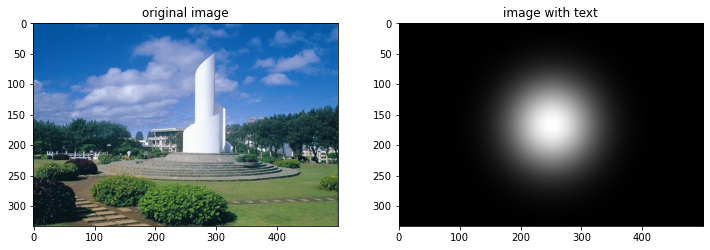

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_formation_model( f, x0, y0, sigma ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    illumination = np.zeros( [ nr, nc ], dtype = 'float32' )
    for x in range( nr ):
        for y in range( nc ):
            illumination[x,y] = np.floor(255*np.exp( -( (x-x0)**2 + (y-y0)**2 ) / (2*sigma*sigma) ))
    for x in range( nr ):
        for y in range( nc ):
            for k in range( 3 ):
                val = round( illumination[x,y] * f[x,y,k])
                g[x,y,k] = np.uint8( val )
    return illumination


imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
nr, nc = img.shape[:2]
x0 = nr/2
y0 = nc/2
sigma = 50
img2 = image_formation_model( img, x0, y0, sigma )
    
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img,cmap=plt.cm.jet)
plt.subplot(1,2,2)   
plt.title('image with text') 
plt.imshow(img2,cmap=plt.cm.gray)

## <font color="Red"> 3-2. Practice: Modify above python program to acquire the image formation result </font>
<img src="Chapter03_1.png" width="800px">

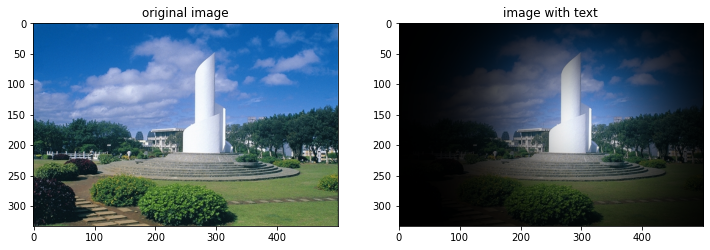

In [2]:
# Practice

import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_formation_model( f, x0, y0, sigma ):
    g = f.copy( ) # copy original image(RGB)
    nr, nc = f.shape[:2] # num of rows and columns
    illumination = np.zeros( [ nr, nc ], dtype = 'float32' )
    for x in range( nr ):
        for y in range( nc ):
            illumination[x,y] = np.floor(255*np.exp( -( (x-x0)**2 + (y-y0)**2 ) / (2*sigma*sigma) )) 
            # r(x, y) = np.exp( -( (x-x0)**2 + (y-y0)**2 ) / (2*sigma*sigma)), 2D Gaussian function
            # 0 ≤ r(x, y) ≤ 1
            # 0~1 and floor, so * 255
    for x in range( nr ):
        for y in range( nc ):
            for k in range( 3 ):
                val = round( illumination[x,y] * f[x,y,k]/255) # this
                g[x,y,k] = np.uint8( val )
    return g

imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
nr, nc = img.shape[:2]
x0 = nr/2
y0 = nc/2+50
sigma = 100
img2 = image_formation_model( img, x0, y0, sigma )
    
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img,cmap=plt.cm.jet)
plt.subplot(1,2,2)   
plt.title('image with text') 
plt.imshow(img2,cmap=plt.cm.jet)

## 3-3. Image Downsampling
#### <font color="Red"> Please check the program to find how the downsampling performed. </font>

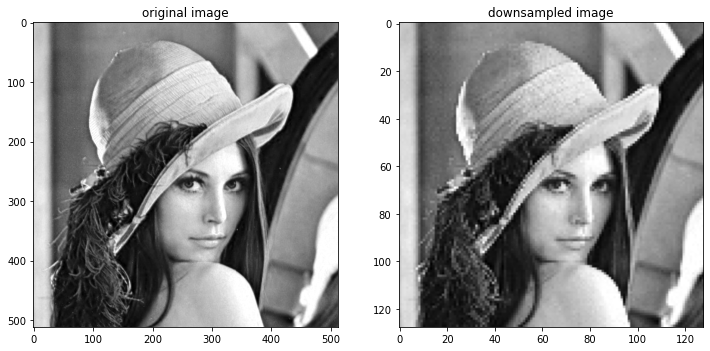

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_downsampling( f, sampling_rate ):
    nr, nc = f.shape[:2]
    nr_s, nc_s = nr // sampling_rate, nc // sampling_rate # 整除
    g = np.zeros( [ nr_s, nc_s ], dtype = 'uint8' )
    for x in range( nr_s ):
        for y in range( nc_s ):
            g[x,y] = f[x * sampling_rate, y * sampling_rate] # get top left element
    return g

def main():
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_downsampling( img1, 4 ) # 512//4 = 128
    plt.figure(figsize=(12, 10))
    plt.subplot(1,2,1)   
    plt.title('original image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,2,2)   
    plt.title('downsampled image') 
    plt.imshow(img2,cmap=plt.cm.gray)

main()

## 3-4. Image Quantization
#### <font color="Red"> Please check the program to find how the quantization performed. </font>

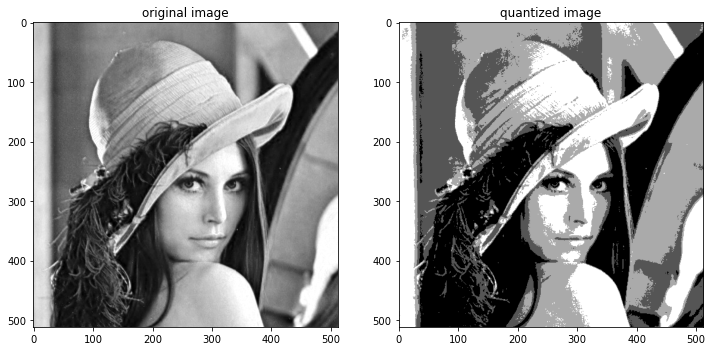

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_quantization( f, bits ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    levels = 2 ** bits
    interval = 256 / levels # 2 bits, 4 levels
    gray_level_interval = 255 / ( levels - 1 )
    table = np.zeros( 256 )
    for k in range( 256 ):
        for l in range( levels ):
            if k >= l * interval and l < ( l + 1 ) * interval:
                table[k] = round( l * gray_level_interval ) 
    # table: # 0~63: 0, 64~127: 85, 128~191:170, 192~255:255
    for x in range( nr ):
        for y in range( nc ):
            g[x,y] = np.uint8( table[f[x,y]] )
    return g

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_quantization( img1, 2 )
    plt.figure(figsize=(12, 10))
    plt.subplot(1,2,1)   
    plt.title('original image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,2,2)   
    plt.title('quantized image') 
    plt.imshow(img2,cmap=plt.cm.gray)
    
main( )

## <font color="Red"> 3-5. Image Quantization version 2 </font>
###  <font color="Red">Please modify above image quantization program by not using 0 and 255 in table </font>

[ 16.   16.   16.   16.   16.   16.   16.   16.   16.   16.   16.   16.
  16.   16.   16.   16.   16.   16.   16.   16.   16.   16.   16.   16.
  16.   16.   16.   16.   48.   48.   48.   48.   48.   48.   48.   48.
  48.   48.   48.   48.   48.   48.   48.   48.   48.   48.   48.   48.
  48.   48.   48.   48.   48.   48.   48.   48.   80.   80.   80.   80.
  80.   80.   80.   80.   80.   80.   80.   80.   80.   80.   80.   80.
  80.   80.   80.   80.   80.   80.   80.   80.   80.   80.   80.   80.
 112.  112.  112.  112.  112.  112.  112.  112.  112.  112.  112.  112.
 112.  112.  112.  112.  112.  112.  112.  112.  112.  112.  112.  112.
 112.  112.  112.  112.  143.5 143.5 143.5 143.5 143.5 143.5 143.5 143.5
 143.5 143.5 143.5 143.5 143.5 143.5 143.5 143.5 143.5 143.5 143.5 143.5
 143.5 143.5 143.5 143.5 143.5 143.5 143.5 143.5 175.  175.  175.  175.
 175.  175.  175.  175.  175.  175.  175.  175.  175.  175.  175.  175.
 175.  175.  175.  175.  175.  175.  175.  175.  175.  175.  1

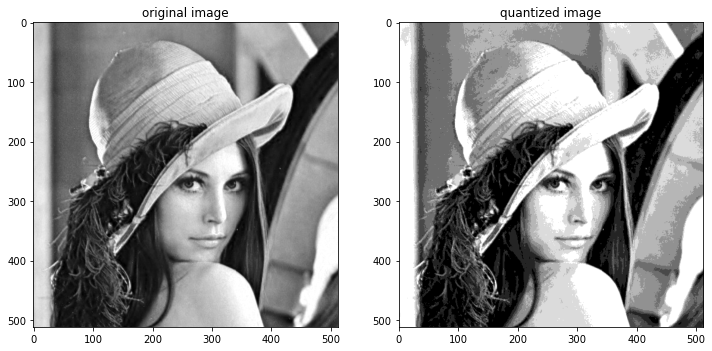

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_quantization( f, bits ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    levels = 2 ** bits
    interval = np.uint8( 256 / (levels+1) )
    gray_level_interval = 255 / ( levels  )
    table = np.zeros( 256 )
    for k in range( 256 ):
        for l in range( levels ):
            if k >= l * interval and l < ( l + 1 ) * interval:
                table[k] = (round( l * gray_level_interval ) + round( ( l + 1 ) * gray_level_interval ) )/2
    for x in range( nr ):
        for y in range( nc ):
            g[x,y] = np.uint8( table[f[x,y]] )
    print(table)
    
    return g

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_quantization( img1, 3 )
    #print(img2)
    plt.figure(figsize=(12, 10))
    plt.subplot(1,2,1)   
    plt.title('original image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,2,2)   
    plt.title('quantized image') 
    plt.imshow(img2,cmap=plt.cm.gray)
    
main( )

##  <font color="Red"> 3-6. Practice Complements(gray) </font>

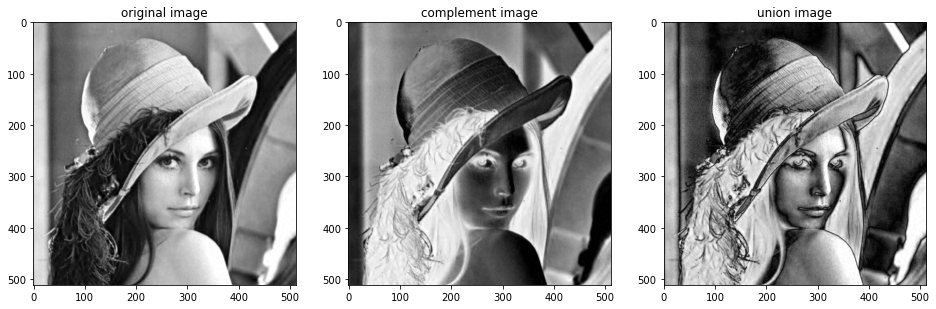

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_complement( f ):
    nr, nc = f.shape[:2]
    g = np.zeros( [ nr, nc ], dtype = 'uint8' )
    for x in range( nr ):
        for y in range( nc ):
            g[x,y] = np.uint8(255 - f[x,y])
    return g

def image_union( f, g ):
    nr, nc = f.shape[:2]
    u = np.zeros( [ nr, nc ], dtype = 'uint8' )
    for x in range( nr ):
        for y in range( nc ):
            u[x,y] = np.uint8(max(f[x,y], g[x,y]))
    return u

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_complement( img1 )
    img3 = image_union( img1, img2 )

    plt.figure(figsize=(16, 12))    
    plt.subplot(1,3,1)   
    plt.title('original image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,3,2)   
    plt.title('complement image') 
    plt.imshow(img2,cmap=plt.cm.gray)
    plt.subplot(1,3,3)   
    plt.title('union image') 
    plt.imshow(img3,cmap=plt.cm.gray)    
main( )

## <font color="Red"> 3-7. Practice Complements(color) </font>

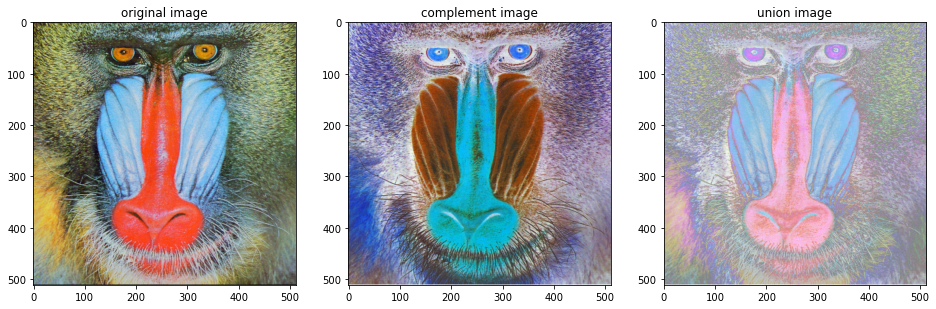

In [7]:
import numpy as np
import cv2

def image_complement( f ):
    nr, nc = f.shape[:2]
    g = np.zeros( [ nr, nc , 3], dtype = 'uint8' )
    for x in range( nr ):
        for y in range( nc ):
            for k in range( 3 ):
                g[x,y,k] = np.uint8(255 - f[x,y,k])
    return g

def image_union( f, g ):
    nr, nc = f.shape[:2]
    u = np.zeros( [ nr, nc ,3], dtype = 'uint8' )
    for x in range( nr ):
        for y in range( nc ):
            for k in range( 3 ):
                u[x,y,k] = np.uint8(max(f[x,y,k], g[x,y,k]))
    return u

def main( ):
    imgBGR = cv2.imread( "Baboon.bmp", cv2.IMREAD_COLOR )
    img1 = imgBGR[:,:,::-1]    
    img2 = image_complement( img1 )
    img3 = image_union( img1, img2 )
    
    plt.figure(figsize=(16, 12))    
    plt.subplot(1,3,1)   
    plt.title('original image') 
    plt.imshow(img1,cmap=plt.cm.jet)
    plt.subplot(1,3,2)   
    plt.title('complement image') 
    plt.imshow(img2,cmap=plt.cm.jet)
    plt.subplot(1,3,3)   
    plt.title('union image') 
    plt.imshow(img3,cmap=plt.cm.jet) 

main( )

## 3-8. Image Scaling

Please enter scale: 4


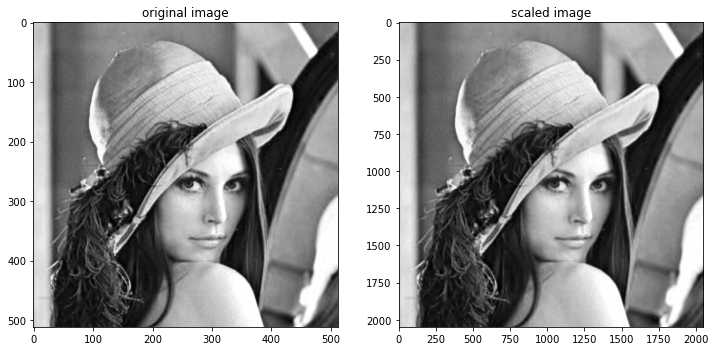

In [8]:
import numpy as np
import cv2

img1 = cv2.imread( "Lenna.bmp", -1 )
nr, nc = img1.shape[:2]
scale = eval( input( "Please enter scale: " ) )
nr2 = int( nr * scale )
nc2 = int( nc * scale )
img2 = cv2.resize( img1, ( nr2, nc2 ), interpolation = cv2.INTER_LINEAR )

plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(1,2,2)   
plt.title('scaled image') 
plt.imshow(img2,cmap=plt.cm.gray)

## 3-9. Image Rescaling

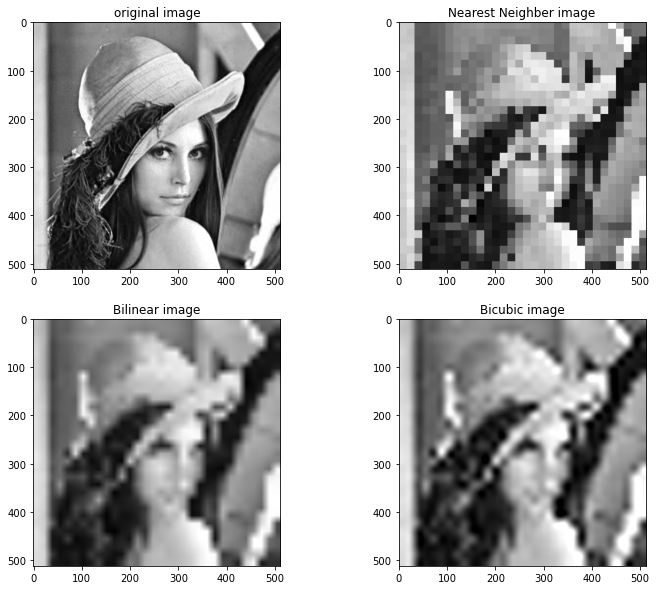

In [9]:
import numpy as np
import cv2

img1 = cv2.imread( "Lenna.bmp", -1 )
nr1, nc1 = img1.shape[:2]
nr2, nc2 = nr1 // 16, nc1 // 16
img2 = cv2.resize( img1, ( nr2, nc2 ), interpolation = cv2.INTER_NEAREST )
img2 = cv2.resize( img2, ( nr1, nc1 ), interpolation = cv2.INTER_NEAREST )
img3 = cv2.resize( img1, ( nr2, nc2 ), interpolation = cv2.INTER_LINEAR )
img3 = cv2.resize( img3, ( nr1, nc1 ), interpolation = cv2.INTER_LINEAR )
img4 = cv2.resize( img1, ( nr2, nc2 ), interpolation = cv2.INTER_CUBIC )
img4 = cv2.resize( img4, ( nr1, nc1 ), interpolation = cv2.INTER_CUBIC ) 

plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(2,2,2)   
plt.title('Nearest Neighber image') 
plt.imshow(img2,cmap=plt.cm.gray)
plt.subplot(2,2,3)   
plt.title('Bilinear image') 
plt.imshow(img3,cmap=plt.cm.gray)
plt.subplot(2,2,4)   
plt.title('Bicubic image') 
plt.imshow(img4,cmap=plt.cm.gray)

## <font color="Red"> 3-10. Homework PSNR</font> <p>
Design a PSNR function to measure the difference between 
(img,img1), (img,img2), and (img,img3)<p>
<img src="https://4.bp.blogspot.com/-82C6B1wcYz0/UvIjcJ4S6TI/AAAAAAAABCY/OwGVIQwgUAc/s1600/fig1.PNG"></p>
<img src="psnr.svg"></p>

In [10]:
import numpy as np
import math

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):   # MSE is zero means no noise is present in the signal .
                    # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0 # MAX
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr
    

psnr1 = psnr(img1,img2)
psnr2 = psnr(img1,img3)
psnr3 = psnr(img1,img4)
print("PSNR between origin and Nearest Neighbor",psnr1)
print("PSNR between origin and Bilinear",psnr2)
print("PSNR between origin and Bicubic",psnr3)

PSNR between origin and Nearest Neighbor 29.152502976255327
PSNR between origin and Bilinear 29.908883947099923
PSNR between origin and Bicubic 29.74890537398418


## 3-11. Image Rotation

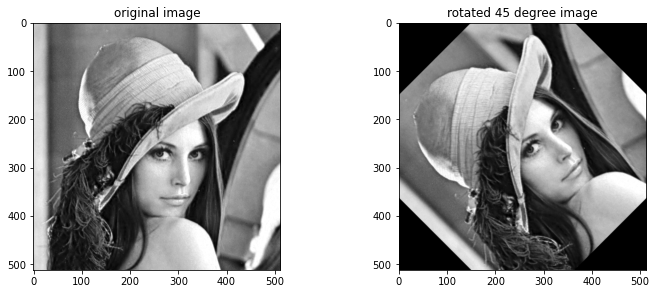

In [11]:
import numpy as np
import cv2

img1 = cv2.imread( "Lenna.bmp", -1 )
nr2, nc2 = img1.shape[:2]
degree = 45
rotation_matrix = cv2.getRotationMatrix2D( ( nr2 / 2, nc2 / 2 ), degree, 1 )
# x' = 𝒙 𝒄𝒐𝒔𝜽 − 𝒚 𝒔𝒊𝒏𝜽
# 𝒚' = 𝒙 𝒔𝒊𝒏𝜽 + 𝒚 𝒄𝒐𝒔𝜽
# [x'] = [cos𝜽 -sin𝜽 ] [x]
# [y'] = [sin𝜽  cos𝜽 ] [y]
# inverse rotation matrix:
# [x] = [ cos𝜽  sin𝜽 ] [x']
# [y] = [-sin𝜽  cos𝜽 ] [y']
img2 = cv2.warpAffine( img1, rotation_matrix, ( nr2, nc2 ) ) 


plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(2,2,2)   
plt.title('rotated '+str(degree)+ ' degree image'  ) 
plt.imshow(img2,cmap=plt.cm.gray)

## 3-12. Image Flip

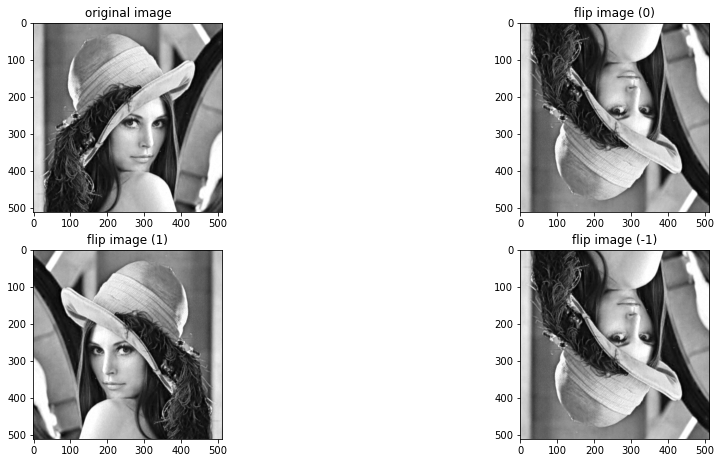

In [12]:
import numpy as np
import cv2

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.flip( img1, 0 )
img3 = cv2.flip( img1, 1 )
img4 = cv2.flip( img1, -1 )
plt.figure(figsize=(16, 16))
plt.subplot(4,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(4,2,2)   
plt.title('flip image (0)'  ) 
plt.imshow(img2,cmap=plt.cm.gray)
plt.subplot(4,2,3)   
plt.title('flip image (1)'  ) 
plt.imshow(img3,cmap=plt.cm.gray)
plt.subplot(4,2,4)   
plt.title('flip image (-1)'  ) 
plt.imshow(img2,cmap=plt.cm.gray)


##  <font color="Red"> 3-13. Homework Flip </font>
#### <font color="Red"> Write Flip function yourself, don't use cv2.flip <p></font>

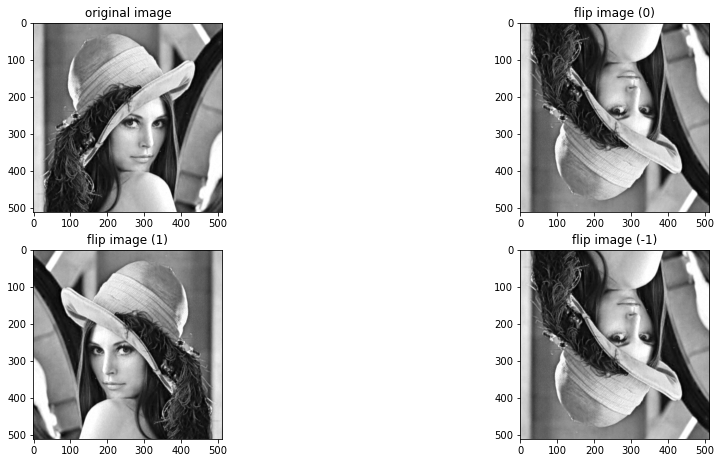

In [13]:
import numpy as np
import math

def my_flip(img1, type):
# type = 0, vertical flip
# type = 1, horizontal flip
# type = -1, vertical and horizontal flip   
    nr, nc = img1.shape[:2]
    u = np.zeros( [ nr, nc ], dtype = 'uint8' )
    
    if( type <= 0 ):
        u = flipVert(img1);
    else:
        u = flipHoriz(img1);

    if( type < 0 ):
        u = flipHoriz(img1);
    
    return u

def flipVert(img):
    v_flip = img[::-1]
    return v_flip;
    
def flipHoriz(img):
    h_flip = img[:, ::-1]
    return h_flip;
    

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = my_flip(img1,0)
img3 = my_flip(img1,1)
img4 = my_flip(img1,-1)

plt.figure(figsize=(16, 16))
plt.subplot(4,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(4,2,2)   
plt.title('flip image (0)'  ) 
plt.imshow(img2,cmap=plt.cm.gray)
plt.subplot(4,2,3)   
plt.title('flip image (1)'  ) 
plt.imshow(img3,cmap=plt.cm.gray)
plt.subplot(4,2,4)   
plt.title('flip image (-1)'  ) 
plt.imshow(img2,cmap=plt.cm.gray)

## 3-14. Perspective Transform

1335 2000


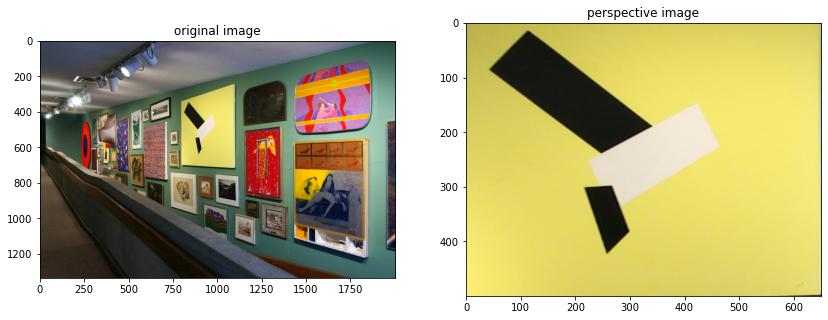

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgBGR = cv2.imread("Gallery.bmp", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
nr, nc = img1.shape[:2]
print(nr,nc)
pts1 = np.float32( [ [ 795, 350 ], [ 795, 690 ], [ 1090, 720 ], [ 1090, 250 ] ] )
pts2 = np.float32( [ [ 0, 0 ], [ 0, 500 ], [ 650, 500 ], [ 650, 0 ] ] )
T = cv2.getPerspectiveTransform( pts1, pts2 )
img2 = cv2.warpPerspective( img1, T, ( 650, 500 ) )

cv2.imwrite( "Gallery_perspec.bmp", img2 )
plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.jet)
plt.subplot(1,2,2)   
plt.title('perspective image') 
plt.imshow(img2,cmap=plt.cm.jet)

## <font color="Red">3-15. Practice:Perspective transform </font>
#### <font color="Red"> use perspective transform to find the following result
<img src="Chapter03_2.png" height="600px">


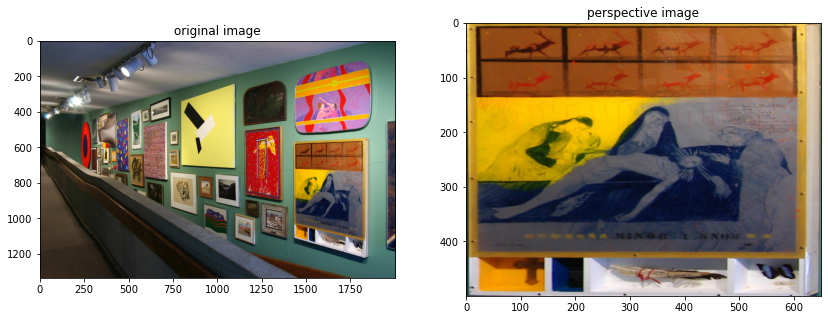

In [15]:
import numpy as np
import cv2

imgBGR = cv2.imread("Gallery.bmp", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
nr, nc = img1.shape[:2]
pts1 = np.float32( [ [ 1425, 575 ], [ 1425, 1110 ], [ 1850, 1225 ], [ 1850, 555 ] ] )
pts2 = np.float32( [ [ 0, 0 ], [ 0, 500 ], [ 650, 500 ], [ 650, 0 ] ] )
T = cv2.getPerspectiveTransform( pts1, pts2 )
img2 = cv2.warpPerspective( img1, T, ( 650, 500 ) )
cv2.imwrite( "Gallery_perspec.bmp", img2 )
plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.jet)
plt.subplot(1,2,2)   
plt.title('perspective image') 
plt.imshow(img2,cmap=plt.cm.jet)

## <font color="Red">3-16. Practice:Rotation and Scaling </font>
#### <font color="Red"> Please use the combination of cv2.getRotationMatrix2D and cv2.warpAffine to rotate an image with given degree and fit in the image under size 512x512
<img src="Chapter03_3.png" height="600px">
<img src="Chapter03_4.png" height="600px">

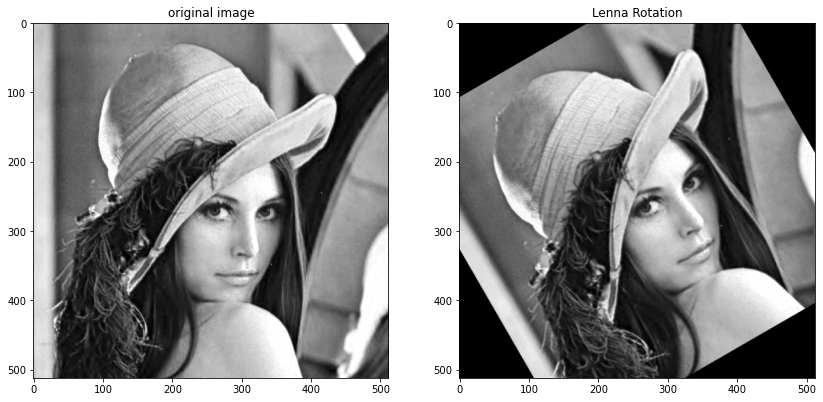

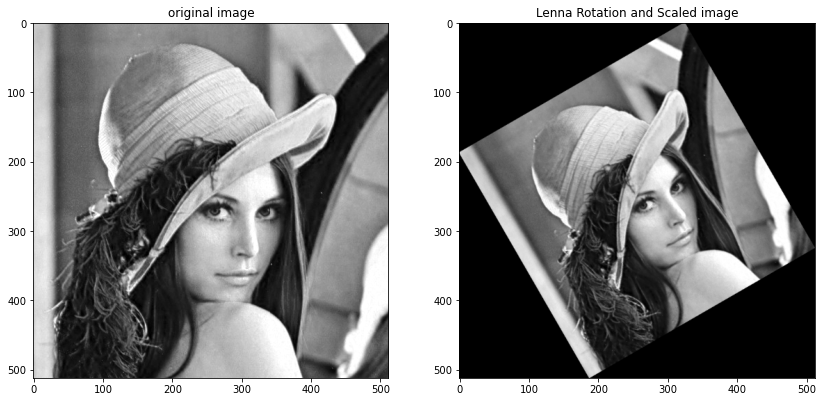

In [17]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread( "Lenna.bmp", -1 )
degree = 30

# get dims, find center
(h, w) = img1.shape[:2]

(cX, cY) = (w//2, h//2) # Get the image center
# img1.shape[1] = the number of rows, img1.shape[0] = the number of columns
rotation_matrix = cv2.getRotationMatrix2D((cX, cY), degree, 1.0) # Calculate the rotation matrix
# cv2.getRotationMatrix2D(center, angle, scale)
new_img = cv2.warpAffine(img1, rotation_matrix, (w, h)) # Transform input image
# cv2.warpAffine(src, M, dsize, dst, flags, borderMode, borderValue)
# src: input image. 
# dst: output image that has the size dsize and the same type as src.
# M: transformation matrix.
# dsize: size of the output image.

plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(1,2,2)   
plt.title('Lenna Rotation') 
plt.imshow(new_img,cmap=plt.cm.gray)

rad = math.radians(degree)
sin = abs(math.sin(rad))
cos = abs(math.cos(rad))

# compute the new bounding dimensions of the image
nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

# adjust the rotation matrix to take into account translation
rotation_matrix[0, 2] += (nW / 2) - cX
rotation_matrix[1, 2] += (nH / 2) - cY

# perform the actual rotation and return the image
new_img2 = cv2.warpAffine(img1, rotation_matrix, (nW, nH), flags=cv2.INTER_LINEAR)

new_img3 = cv2.resize( new_img2, ( 512, 512 ), interpolation = cv2.INTER_LINEAR )

plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(1,2,2)   
plt.title('Lenna Rotation and Scaled image') 
plt.imshow(new_img3,cmap=plt.cm.gray)
